<a href="https://colab.research.google.com/github/Veronicacarr22/resume-similarity-tfidf/blob/main/notebooks/ResumesSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pdfplumber
import os, logging, pdfplumber, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pdf_loggers = [logging.getLogger(n) for n in logging.root.manager.loggerDict if n.startswith('pdfminer')]
for lg in pdf_loggers: lg.setLevel(logging.ERROR)

In [3]:
import nltk
nltk.download('punkt'); nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
RESUME_BASE = "data/resumes"   # can contain nested subfolders
JOB_DIR     = "data/jobs"
os.makedirs(RESUME_BASE, exist_ok=True)
os.makedirs(JOB_DIR, exist_ok=True)
print("Resume base:", os.path.abspath(RESUME_BASE))
print("Job dir    :", os.path.abspath(JOB_DIR))

Resume base: /content/data/resumes
Job dir    : /content/data/jobs


In [5]:
!ls -lah /content
!ls -lah /content/data
!ls -lah /content/data/resumes/
!ls -lah /content
!ls -lah /content/data
!ls -lah /content/data/resumes
!ls -lah /content/data/resumes/data1

total 24K
drwxr-xr-x 1 root root 4.0K Sep  1 18:38 .
drwxr-xr-x 1 root root 4.0K Sep  1 18:37 ..
drwxr-xr-x 4 root root 4.0K Aug 28 13:42 .config
drwxr-xr-x 4 root root 4.0K Sep  1 18:38 data
drwx------ 5 root root 4.0K Sep  1 18:38 drive
drwxr-xr-x 1 root root 4.0K Aug 28 13:43 sample_data
total 16K
drwxr-xr-x 4 root root 4.0K Sep  1 18:38 .
drwxr-xr-x 1 root root 4.0K Sep  1 18:38 ..
drwxr-xr-x 2 root root 4.0K Sep  1 18:38 jobs
drwxr-xr-x 3 root root 4.0K Sep  1 18:43 resumes
total 56M
drwxr-xr-x  3 root root 4.0K Sep  1 18:43 .
drwxr-xr-x  4 root root 4.0K Sep  1 18:38 ..
drwxr-xr-x 26 root root 4.0K Sep  1 18:43 data
-rw-r--r--  1 root root  56M Sep  1 18:42 data1.zip
total 24K
drwxr-xr-x 1 root root 4.0K Sep  1 18:38 .
drwxr-xr-x 1 root root 4.0K Sep  1 18:37 ..
drwxr-xr-x 4 root root 4.0K Aug 28 13:42 .config
drwxr-xr-x 4 root root 4.0K Sep  1 18:38 data
drwx------ 5 root root 4.0K Sep  1 18:38 drive
drwxr-xr-x 1 root root 4.0K Aug 28 13:43 sample_data
total 16K
drwxr-xr-x 4 roo

In [6]:
!unzip -o "/content/data/resumes/data1.zip" -d "/content/data/resumes"

Archive:  /content/data/resumes/data1.zip
  inflating: /content/data/resumes/data/BPO/57706851.pdf  
  inflating: /content/data/resumes/data/BPO/45077654.pdf  
  inflating: /content/data/resumes/data/MyResume.pdf  
  inflating: /content/data/resumes/data/BPO/11183737.pdf  
  inflating: /content/data/resumes/data/BPO/69097572.pdf  
  inflating: /content/data/resumes/data/BPO/16492045.pdf  
  inflating: /content/data/resumes/data/BPO/41152404.pdf  
  inflating: /content/data/resumes/data/BPO/79261033.pdf  
  inflating: /content/data/resumes/data/BPO/95625660.pdf  
  inflating: /content/data/resumes/data/BPO/24727739.pdf  
  inflating: /content/data/resumes/data/BPO/89512321.pdf  
  inflating: /content/data/resumes/data/BPO/63158213.pdf  
  inflating: /content/data/resumes/data/BPO/26829350.pdf  
  inflating: /content/data/resumes/data/BPO/18589927.pdf  
  inflating: /content/data/resumes/data/BPO/13964744.pdf  
  inflating: /content/data/resumes/data/BPO/19362586.pdf  
  inflating: /cont

In [7]:
!ls -lah /content/data/resumes | head -n 20
!find /content/data/resumes -maxdepth 2 -type f | head -n 20

total 56M
drwxr-xr-x  3 root root 4.0K Sep  1 18:43 .
drwxr-xr-x  4 root root 4.0K Sep  1 18:38 ..
drwxr-xr-x 26 root root 4.0K Sep  1 19:25 data
-rw-r--r--  1 root root  56M Sep  1 18:42 data1.zip
/content/data/resumes/data/MyResume.pdf
/content/data/resumes/data1.zip


In [8]:
import os
for root, _, files in os.walk("data/resumes"):
    for f in files[:10]:  # just show first 10
        print(os.path.join(root, f))

data/resumes/data1.zip
data/resumes/data/MyResume.pdf
data/resumes/data/DIGITAL-MEDIA/29002596.pdf
data/resumes/data/DIGITAL-MEDIA/29915354.pdf
data/resumes/data/DIGITAL-MEDIA/19444529.pdf
data/resumes/data/DIGITAL-MEDIA/20210676.pdf
data/resumes/data/DIGITAL-MEDIA/50219114.pdf
data/resumes/data/DIGITAL-MEDIA/20490741.pdf
data/resumes/data/DIGITAL-MEDIA/81508860.pdf
data/resumes/data/DIGITAL-MEDIA/17584743.pdf
data/resumes/data/DIGITAL-MEDIA/26341987.pdf
data/resumes/data/DIGITAL-MEDIA/91539554.pdf
data/resumes/data/ADVOCATE/89508407.pdf
data/resumes/data/ADVOCATE/13809698.pdf
data/resumes/data/ADVOCATE/37640804.pdf
data/resumes/data/ADVOCATE/53169257.pdf
data/resumes/data/ADVOCATE/75950464.pdf
data/resumes/data/ADVOCATE/72652441.pdf
data/resumes/data/ADVOCATE/15313140.pdf
data/resumes/data/ADVOCATE/16332348.pdf
data/resumes/data/ADVOCATE/26456474.pdf
data/resumes/data/ADVOCATE/20765795.pdf
data/resumes/data/CHEF/10001727.pdf
data/resumes/data/CHEF/62555739.pdf
data/resumes/data/CHEF/2

In [9]:
pdfDF = pd.DataFrame(columns=['FileName','Text'])

def read_pdf_text(path):
    try:
        with pdfplumber.open(path) as pdf:
            parts = [(page.extract_text() or "").lower() for page in pdf.pages]
        return " ".join([p for p in parts if p]).strip()
    except Exception as e:
        print(f"[WARN] PDF read error: {path} ({e})"); return ""

def read_txt_text(path):
    try:
        with open(path, "r", encoding="utf-8", errors="ignore") as f:
            return f.read().lower().strip()
    except Exception as e:
        print(f"[WARN] TXT read error: {path} ({e})"); return ""

loaded = 0
for root, _, files in os.walk(RESUME_BASE):
    for fname in files:
        fpath = os.path.join(root, fname)
        if fname.lower().endswith(".pdf"):
            text = read_pdf_text(fpath)
        elif fname.lower().endswith(".txt"):
            text = read_txt_text(fpath)
        else:
            continue
        if text:
            relname = os.path.relpath(fpath, RESUME_BASE)
            pdfDF.loc[len(pdfDF)] = [relname, text]; loaded += 1

print(f"Loaded {loaded} documents."); print(pdfDF.shape); pdfDF.head()

Loaded 2484 documents.
(2484, 2)


,FileName,Text
0,data/MyResume.pdf,veronica carr\nveronicacarr22@gmail.com • (262...
1,data/DIGITAL-MEDIA/29002596.pdf,"director, global digital marketing\nexecutive ..."
2,data/DIGITAL-MEDIA/29915354.pdf,digital media producer\nsummary\nexperienced a...
3,data/DIGITAL-MEDIA/19444529.pdf,videographer\nprofessional profile\ncreative i...
4,data/DIGITAL-MEDIA/20210676.pdf,digital communications specialist\nsummary\ndi...


In [10]:
import nltk

# install the CORRECT resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # if you do POS tagging later

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return " ".join([w for w in tokens if w.lower() not in stop_words])
    return ""

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
pdfDF['Text'] = pdfDF['Text'].apply(remove_stopwords)
pdfDF = pdfDF[pdfDF['Text'].str.strip().astype(bool)].reset_index(drop=True)

print("After stopword removal:", pdfDF.shape)
pdfDF.head(3)

After stopword removal: (2484, 2)


,FileName,Text
0,data/MyResume.pdf,veronica carr veronicacarr22 @ gmail.com • ( 2...
1,data/DIGITAL-MEDIA/29002596.pdf,"director , global digital marketing executive ..."
2,data/DIGITAL-MEDIA/29915354.pdf,digital media producer summary experienced inn...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Build corpus
corpus = pdfDF['Text'].tolist()
if not corpus or all(not d.strip() for d in corpus):
    raise ValueError("No valid text after cleaning. Check inputs.")

# Vectorize
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X = vectorizer.fit_transform(corpus)

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("TF-IDF shape   :", X.shape)

Vocabulary size: 41763
TF-IDF shape   : (2484, 41763)


In [16]:
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# cosine similarity on TF-IDF
pairwise = linear_kernel(X, X)

# index/columns are your file names
MatrixDF = pd.DataFrame(pairwise,
                        columns=pdfDF['FileName'],
                        index=pdfDF['FileName'])

MatrixDF.iloc[:3, :3]  # quick peek

FileName,data/MyResume.pdf,data/DIGITAL-MEDIA/29002596.pdf,data/DIGITAL-MEDIA/29915354.pdf
FileName,,,
data/MyResume.pdf,1.000000,0.086403,0.028913
data/DIGITAL-MEDIA/29002596.pdf,0.086403,1.000000,0.085573
data/DIGITAL-MEDIA/29915354.pdf,0.028913,0.085573,1.000000


In [17]:
import os

FinalDF = pd.DataFrame(columns=['Source File','Match File','Sim Score'])

for i, src in enumerate(MatrixDF.index):
    sims = MatrixDF.iloc[i].sort_values(ascending=False).head(5)
    for dst, score in sims.items():
        FinalDF.loc[len(FinalDF)] = [src, dst, float(score)]

os.makedirs("reports/tables", exist_ok=True)
FinalDF.to_csv("reports/tables/DocSims.csv", index=False)

FinalDF.head(10)

,Source File,Match File,Sim Score
0,data/MyResume.pdf,data/MyResume.pdf,1.000000
1,data/MyResume.pdf,data/INFORMATION-TECHNOLOGY/48037995.pdf,0.241418
2,data/MyResume.pdf,data/ADVOCATE/20544228.pdf,0.229728
3,data/MyResume.pdf,data/INFORMATION-TECHNOLOGY/13405733.pdf,0.198348
4,data/MyResume.pdf,data/HEALTHCARE/16121387.pdf,0.198216
5,data/DIGITAL-MEDIA/29002596.pdf,data/DIGITAL-MEDIA/29002596.pdf,1.000000
6,data/DIGITAL-MEDIA/29002596.pdf,data/DIGITAL-MEDIA/23810469.pdf,0.480509
7,data/DIGITAL-MEDIA/29002596.pdf,data/DIGITAL-MEDIA/27080812.pdf,0.453385
8,data/DIGITAL-MEDIA/29002596.pdf,data/SALES/15765660.pdf,0.440558
9,data/DIGITAL-MEDIA/29002596.pdf,data/DIGITAL-MEDIA/22706174.pdf,0.434550


In [18]:
FinalDF_my = pd.DataFrame(columns=['Source File','Match File','Sim Score'])

label_for_my_resume = 'data/MyResume.pdf'  # adjust if your name/path differs
if label_for_my_resume in MatrixDF.index:
    my_sims = MatrixDF.loc[label_for_my_resume].sort_values(ascending=False).head(5)
    for dst, score in my_sims.items():
        FinalDF_my.loc[len(FinalDF_my)] = [label_for_my_resume, dst, float(score)]
else:
    print(f"Note: '{label_for_my_resume}' not found in MatrixDF.index.")

FinalDF_my.to_csv("reports/tables/TopMatches_MyResume.csv", index=False)
FinalDF_my

,Source File,Match File,Sim Score
0,data/MyResume.pdf,data/MyResume.pdf,1.000000
1,data/MyResume.pdf,data/INFORMATION-TECHNOLOGY/48037995.pdf,0.241418
2,data/MyResume.pdf,data/ADVOCATE/20544228.pdf,0.229728
3,data/MyResume.pdf,data/INFORMATION-TECHNOLOGY/13405733.pdf,0.198348
4,data/MyResume.pdf,data/HEALTHCARE/16121387.pdf,0.198216


In [19]:
# Reuse the readers you already defined: read_pdf_text, read_txt_text
JOB_DIR = "data/jobs"

jd_text = ""
for fname in os.listdir(JOB_DIR):
    path = os.path.join(JOB_DIR, fname)
    if fname.lower().endswith(".pdf"):
        jd_text = read_pdf_text(path); break
    if fname.lower().endswith(".txt"):
        jd_text = read_txt_text(path); break

if jd_text:
    from sklearn.metrics.pairwise import cosine_similarity

    texts = [jd_text] + pdfDF['Text'].tolist()          # JD first, then resumes
    tfidf2 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    X2 = tfidf2.fit_transform(texts)

    scores = cosine_similarity(X2[0], X2[1:]).flatten() # JD vs each resume

    JDResults = pdfDF[['FileName']].copy()
    JDResults['Similarity'] = scores
    JDResults = JDResults.sort_values('Similarity', ascending=False).reset_index(drop=True)

    os.makedirs("reports/tables", exist_ok=True)
    JDResults.to_csv("reports/tables/JD_Matches.csv", index=False)

    JDResults.head(10)
else:
    print("No JD found in data/jobs/. Add a .txt or .pdf to generate JD_Matches.csv.")

No JD found in data/jobs/. Add a .txt or .pdf to generate JD_Matches.csv.


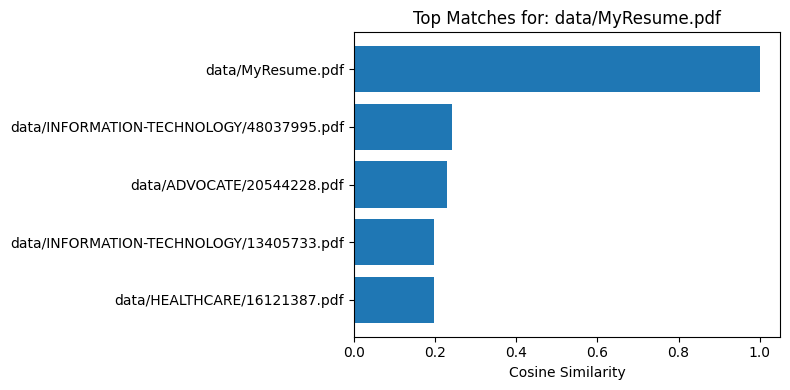

In [20]:
import matplotlib.pyplot as plt

# pick the first source in FinalDF and plot its top 5 matches
example_src = FinalDF.iloc[0]['Source File']
top = FinalDF[FinalDF['Source File'] == example_src].head(5)

plt.figure(figsize=(8,4))
plt.barh(top['Match File'], top['Sim Score'])
plt.gca().invert_yaxis()
plt.title(f'Top Matches for: {example_src}')
plt.xlabel('Cosine Similarity')
plt.tight_layout()

os.makedirs("reports/figures", exist_ok=True)
plt.savefig("reports/figures/resume_similarity.png", dpi=150)
plt.show()